In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats


In [2]:
df = pd.read_csv("JobMarketData.csv")
df

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary,Min Experience
0,Data Scientist,2Coms,New Delhi,2 - 7 years,DataModeling\nEnterpriseApplications\nAnalytic...,838,B.Tech,Freelance,1000000-2000000,1000000,2000000,2
1,Machine Learning Engineer,2Coms,Mumbai,0-5 Yrs,Python\nComputerVision\nMachineLearning\nR\nBu...,4000,UG,Full Time,1800000-3300000,1800000,3300000,0
2,Data Scientist,2Coms Consulting Pvt Ltd.,"Chennai, Bengaluru",6-11 Yrs,Machine Learning Code DataScience R Data Model...,10000,Phd,Full Time,160000-185000,160000,185000,6
3,Machine Learning Engineer,2Coms Consulting Pvt Ltd.,"Chennai, Pune, Mumbai",3-8 Yrs,DataScience\nR\nNLP\nAlgorithms\nArtificialInt...,10000,PG/Phd,Full Time,1200000-2100000,1200000,2100000,3
4,Data Scientist,3D India Staffing Research & Consulting Co India,Bengaluru,8-13 Yrs,Team Handling\nSegmentation\nOperations Resear...,200,Phd,Full Time,5000000-1700000,5000000,1700000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
383,Machine Leaening Engineer,Teksun Microsys Pvt Ltd,Ahmedabad,0-3 Yrs,Python\nSQL\nDeepLearning,500,UG,Full Time,400000-600000,400000,600000,0
384,Data Analyst,Nike India,Bengaluru,0-5 Yrs,MachineLearning\nDataAnalytics\nOperations\nSQL,75400,UG,Full Time,400000-600000,400000,600000,0
385,Data Scientist,Simulation Hub,Pune,1-3 Yrs,DataVisualization\nInformationTechnology\nAnal...,200,UG,Full Time,800000-1000000,800000,1000000,1
386,Data Scientist,NEEMTREE INTERNET PVT LTD,Gurgaon,4-8 Yrs,BusinessIntelligence\nAnalytics\nPython,50,UG,Full Time,NaN,#VALUE!,#VALUE!,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Role                  388 non-null    object
 1   Companies             388 non-null    object
 2   Location              388 non-null    object
 3   Experience            388 non-null    object
 4   Skills                388 non-null    object
 5   Company Size          373 non-null    object
 6   Eligibility Criteria  388 non-null    object
 7   Enrollment Type       388 non-null    object
 8   Salary                326 non-null    object
 9   Min Salary            388 non-null    object
 10  Max Salary            388 non-null    object
 11  Min Experience        388 non-null    object
dtypes: object(12)
memory usage: 36.5+ KB


In [4]:
df.head()

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary,Min Experience
0,Data Scientist,2Coms,New Delhi,2 - 7 years,DataModeling\nEnterpriseApplications\nAnalytic...,838,B.Tech,Freelance,1000000-2000000,1000000,2000000,2
1,Machine Learning Engineer,2Coms,Mumbai,0-5 Yrs,Python\nComputerVision\nMachineLearning\nR\nBu...,4000,UG,Full Time,1800000-3300000,1800000,3300000,0
2,Data Scientist,2Coms Consulting Pvt Ltd.,"Chennai, Bengaluru",6-11 Yrs,Machine Learning Code DataScience R Data Model...,10000,Phd,Full Time,160000-185000,160000,185000,6
3,Machine Learning Engineer,2Coms Consulting Pvt Ltd.,"Chennai, Pune, Mumbai",3-8 Yrs,DataScience\nR\nNLP\nAlgorithms\nArtificialInt...,10000,PG/Phd,Full Time,1200000-2100000,1200000,2100000,3
4,Data Scientist,3D India Staffing Research & Consulting Co India,Bengaluru,8-13 Yrs,Team Handling\nSegmentation\nOperations Resear...,200,Phd,Full Time,5000000-1700000,5000000,1700000,8


In [5]:
df.columns

Index(['Role', 'Companies', 'Location', 'Experience', 'Skills', 'Company Size',
       'Eligibility Criteria', 'Enrollment Type', 'Salary', 'Min Salary',
       'Max Salary', 'Min Experience'],
      dtype='object')

In [6]:
df.drop(columns=['Skills', 'Max Salary', 'Experience', 'Salary'], errors='ignore', inplace=True)

In [7]:
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 Role                     0
Companies                0
Location                 0
Company Size            15
Eligibility Criteria     0
Enrollment Type          0
Min Salary               0
Min Experience           0
dtype: int64


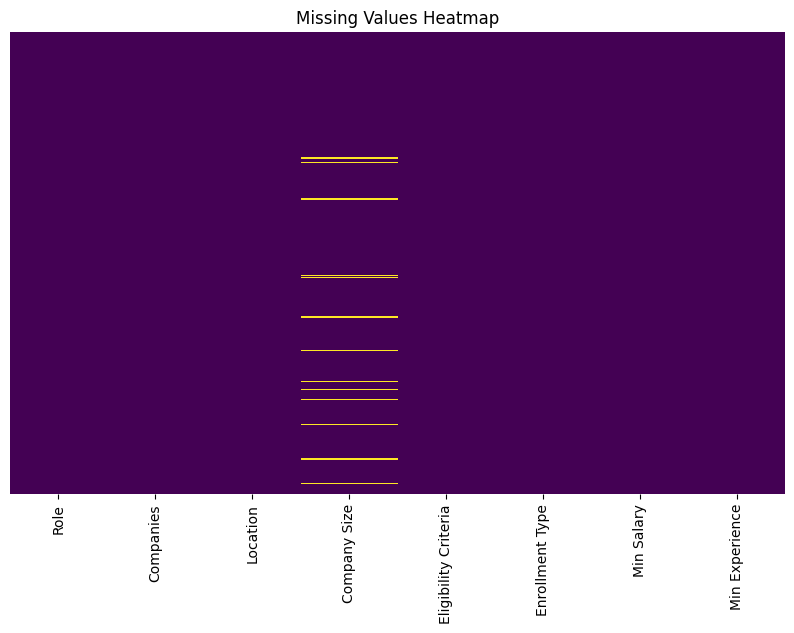

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [9]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [10]:
thresh = len(df) * 0.5
df = df.dropna(thresh=thresh, axis=1)

In [11]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [12]:
df_columns = df.select_dtypes(include=['object']).columns
for col in df_columns:
    if df[col].str.replace('.', '', 1).str.isnumeric().all():
        df[col] = df[col].astype(float)

In [13]:
encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [14]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

<Figure size 1200x600 with 0 Axes>

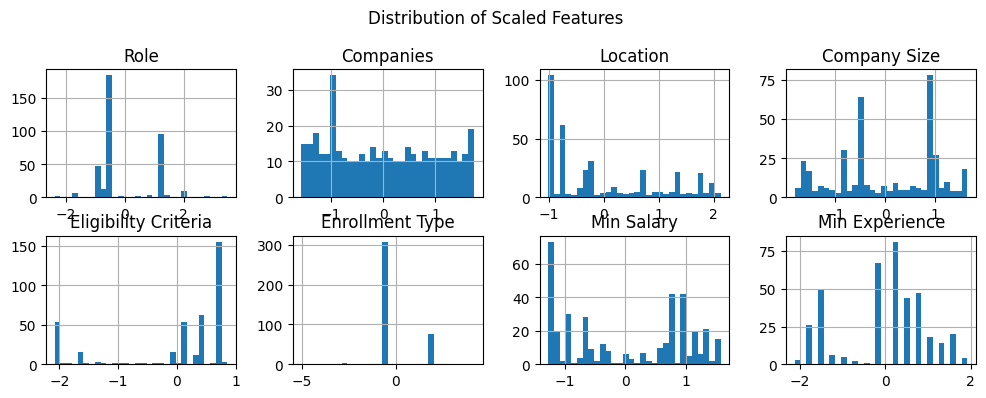

In [15]:
plt.figure(figsize=(12, 6))
df_scaled.hist(bins=30, figsize=(12, 6), layout=(3, 4))
plt.suptitle("Distribution of Scaled Features")
plt.show()


In [16]:
z_scores = np.abs(stats.zscore(df_scaled))
df_cleaned = df_scaled[(z_scores < 3).all(axis=1)]


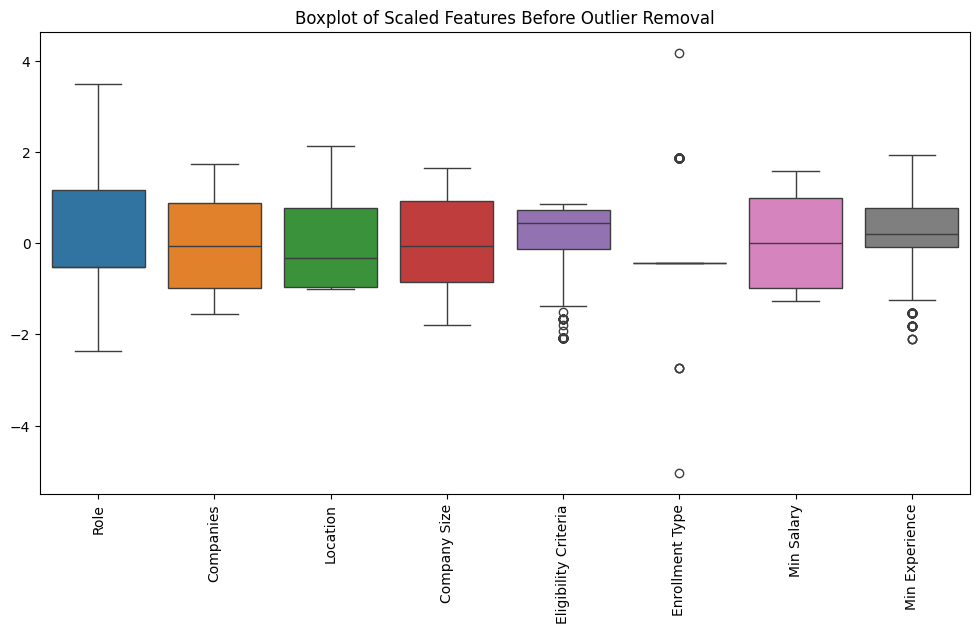

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=90)
plt.title("Boxplot of Scaled Features Before Outlier Removal")
plt.show()


In [18]:
#Before PCA
models = {
    "KMeans": KMeans(n_clusters=2, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN()
}

silhouette_scores = {}
cluster_labels = {}
for name, model in models.items():
    labels = model.fit_predict(df_cleaned)
    cluster_labels[name] = labels
    if len(set(labels)) > 1:  
        score = silhouette_score(df_cleaned, labels)
        silhouette_scores[name] = score


In [19]:
best_model = max(silhouette_scores, key=silhouette_scores.get)
print("Best Model based on Silhouette Score:", best_model)
print("Silhouette Scores:", silhouette_scores)


Best Model based on Silhouette Score: Agglomerative
Silhouette Scores: {'KMeans': 0.12274009524629072, 'Agglomerative': 0.16805028373940237, 'DBSCAN': -0.12488496729479398}


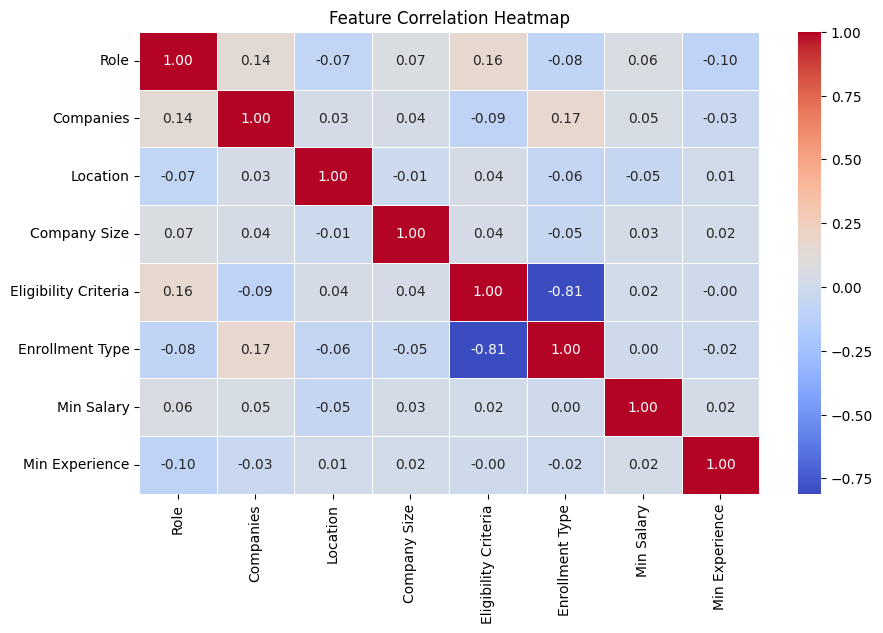

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

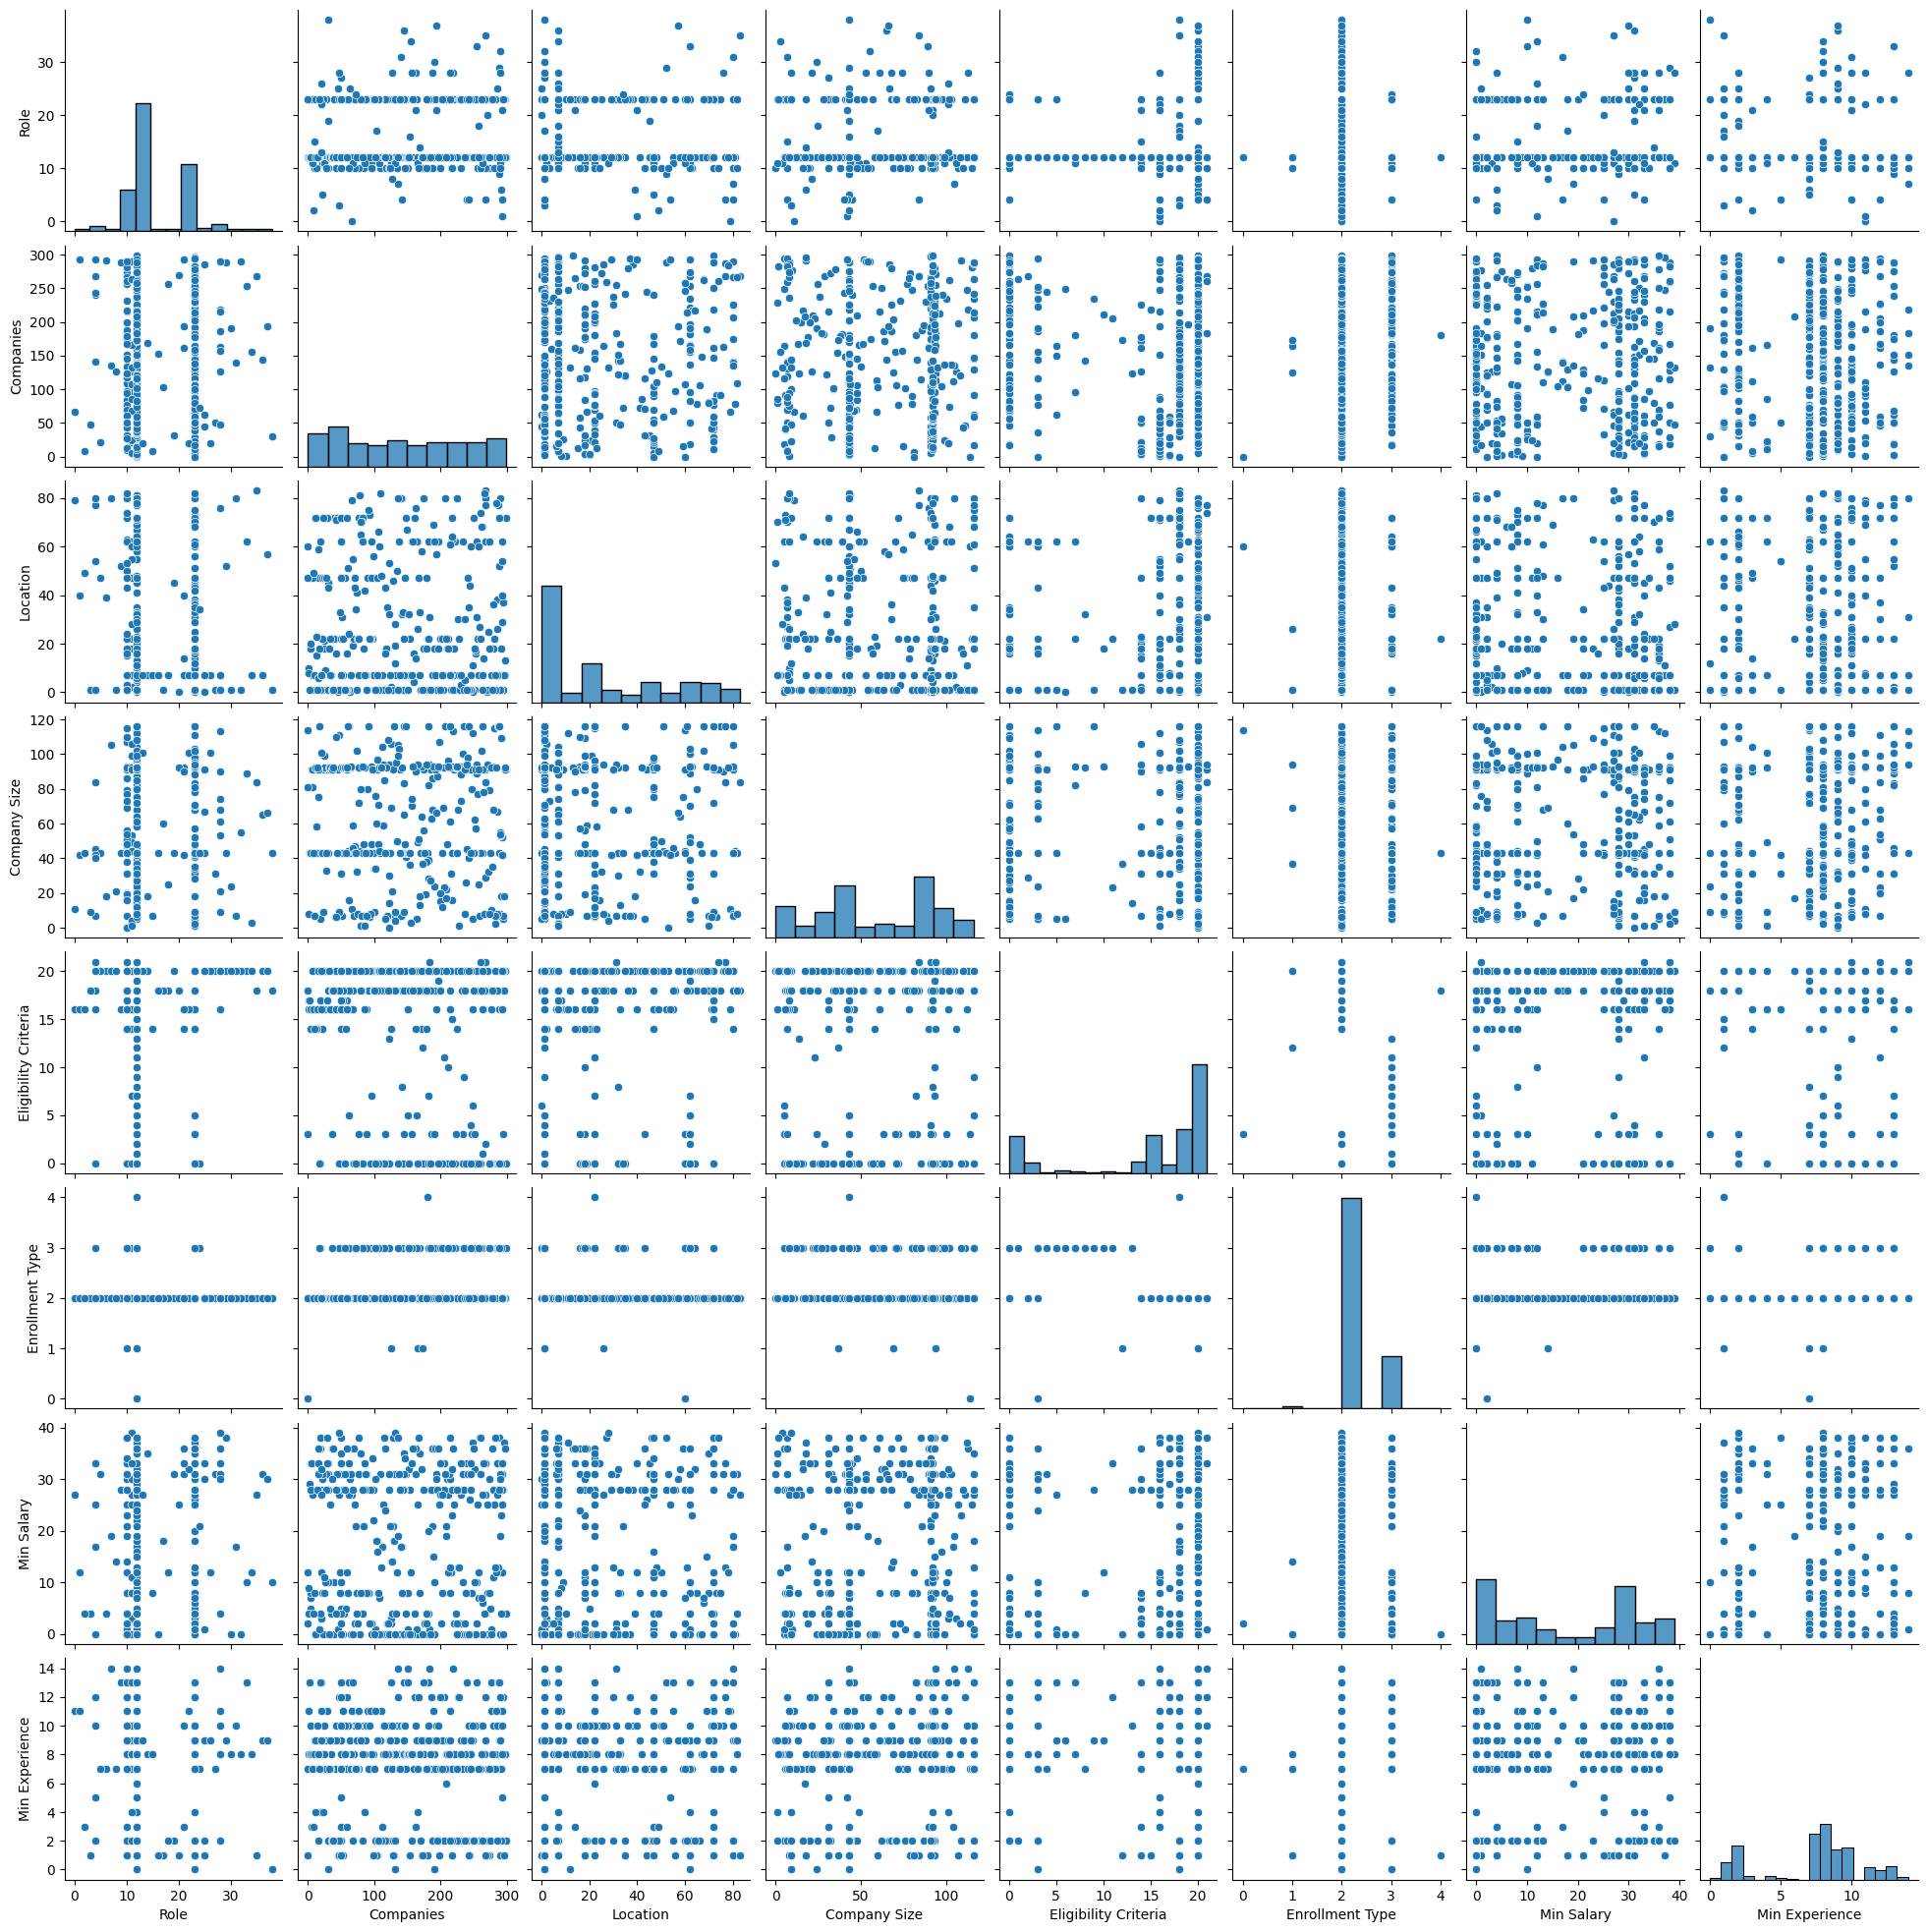

In [24]:
sample_size = min(500, len(df))
sns.pairplot(df.sample(n=sample_size, random_state=42))
plt.show()


In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(df)
x_pca = pca.transform(df)
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(5)])
print(df_pca1)

            PC1        PC2        PC3        PC4        PC5
0   -140.223970  54.664483  36.445353 -14.194833 -12.395289
1   -140.852088  22.356726  22.335848  -3.599181   6.247094
2   -141.688361 -49.922449 -17.927774  -7.367675   0.926807
3   -141.579248 -49.911813 -15.982015 -11.981821   5.688615
4   -140.008229 -14.539244 -24.862385  11.893813  -0.288815
..          ...        ...        ...        ...        ...
383  128.816703  29.806121 -27.607005   5.397655   4.750661
384   57.010180  45.906171 -25.324626   5.462879  -0.459908
385  108.729518 -20.345789  43.183676  19.545220   0.840146
386   48.743424  29.398692  -7.742838 -18.491828   1.332725
387  -24.815308 -17.078128 -11.103435   6.224671 -12.008832

[388 rows x 5 columns]


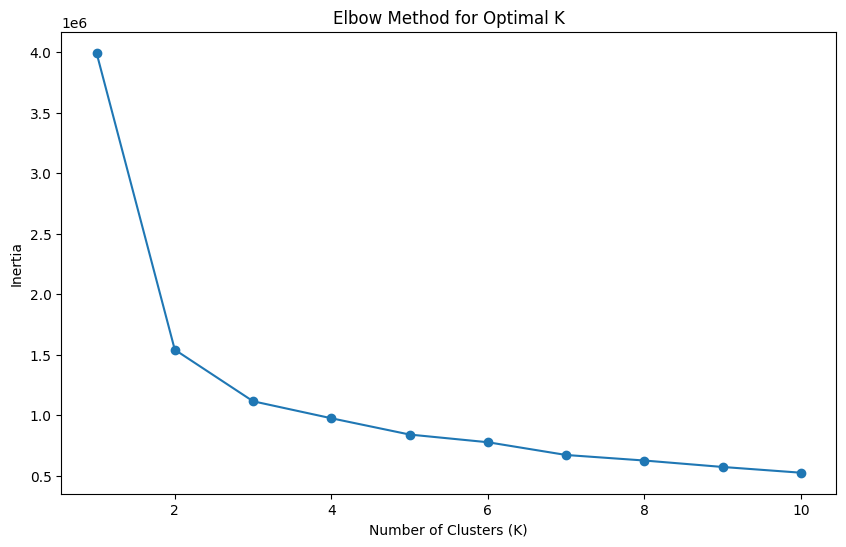

In [26]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca1)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [27]:
models = {
    "KMeans": KMeans(n_clusters=2, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN()
}

silhouette_scores = {}
cluster_labels = {}
for name, model in models.items():
    labels = model.fit_predict(df_pca1)
    cluster_labels[name] = labels
    if len(set(labels)) > 1: 
        score = silhouette_score(df_pca1, labels)
        silhouette_scores[name] = score

In [28]:
best_model = max(silhouette_scores, key=silhouette_scores.get)
print("Best Model based on Silhouette Score:", best_model)
print("Silhouette Scores:", silhouette_scores)

Best Model based on Silhouette Score: KMeans
Silhouette Scores: {'KMeans': 0.4864120367640865, 'Agglomerative': 0.3415287869133608}


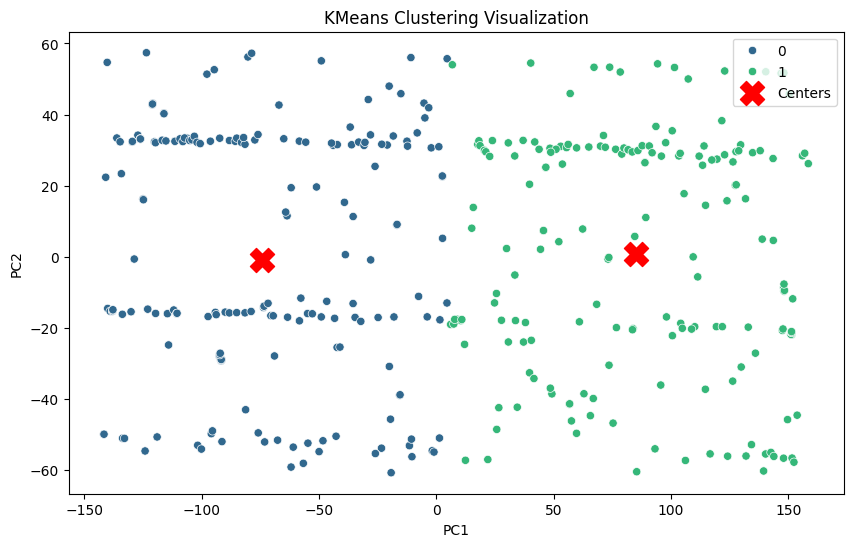

In [29]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca1.iloc[:, 0], y=df_pca1.iloc[:, 1], hue=kmeans_labels, palette="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centers')
plt.legend(loc='upper right')
plt.title("KMeans Clustering Visualization")
plt.show()

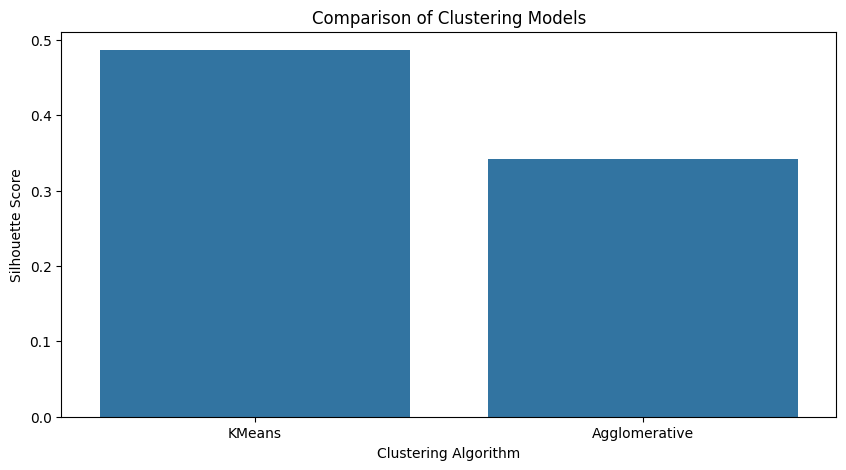

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(silhouette_scores.keys()), y=list(silhouette_scores.values()))
plt.xlabel("Clustering Algorithm")
plt.ylabel("Silhouette Score")
plt.title("Comparison of Clustering Models")
plt.show()


In [31]:
silhouette_kmeans = silhouette_score(df_pca1, kmeans_labels)
print("Silhouette Score for Optimized KMeans:", silhouette_kmeans)

Silhouette Score for Optimized KMeans: 0.4864120367640865
